# PROBLEM STATEMENT


<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/88/Yellow_Happy.jpg"
         alt="Happy Faces"  width="400">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Happy Faces Classification
  </td></tr>
</table>




- The dataset contains a series of images that can be used to solve the Happy House problem! 
- We need to build an artificial neural network that can detect smiling faces.
- Only smiling people will be allowed to enter the house!
- The train set has 600 examples. The test set has 150 examples.
- Data Source: https://www.kaggle.com/iarunava/happy-house-dataset

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# STEP #0: IMPORT LIBRARIES

In [0]:
!pip install tensorflow-gpu==2.0.0-beta1


     |████████████████████████████████| 348.9MB 80kB/s 
     |████████████████████████████████| 3.1MB 29.0MB/s 
     |████████████████████████████████| 501kB 41.0MB/s 


In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py
import random 

# STEP #1: IMPORT DATASETS AND NORMALIZE IT

In [0]:
filename = '/content/drive/My Drive/Colab Notebooks/train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.


list_classes
train_set_x
train_set_y


In [0]:
happy_training = h5py.File('/content/drive/My Drive/Colab Notebooks/train_happy.h5', "r")
happy_testing  = h5py.File('/content/drive/My Drive/Colab Notebooks/test_happy.h5', "r")

In [0]:
X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:]) 


In [0]:
X_train

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

In [0]:
X_train.shape

(600, 64, 64, 3)

In [0]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [0]:
y_train.shape

(600,)

# STEP #2: VISUALIZE DATASET

0


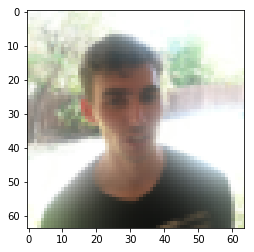

In [0]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])


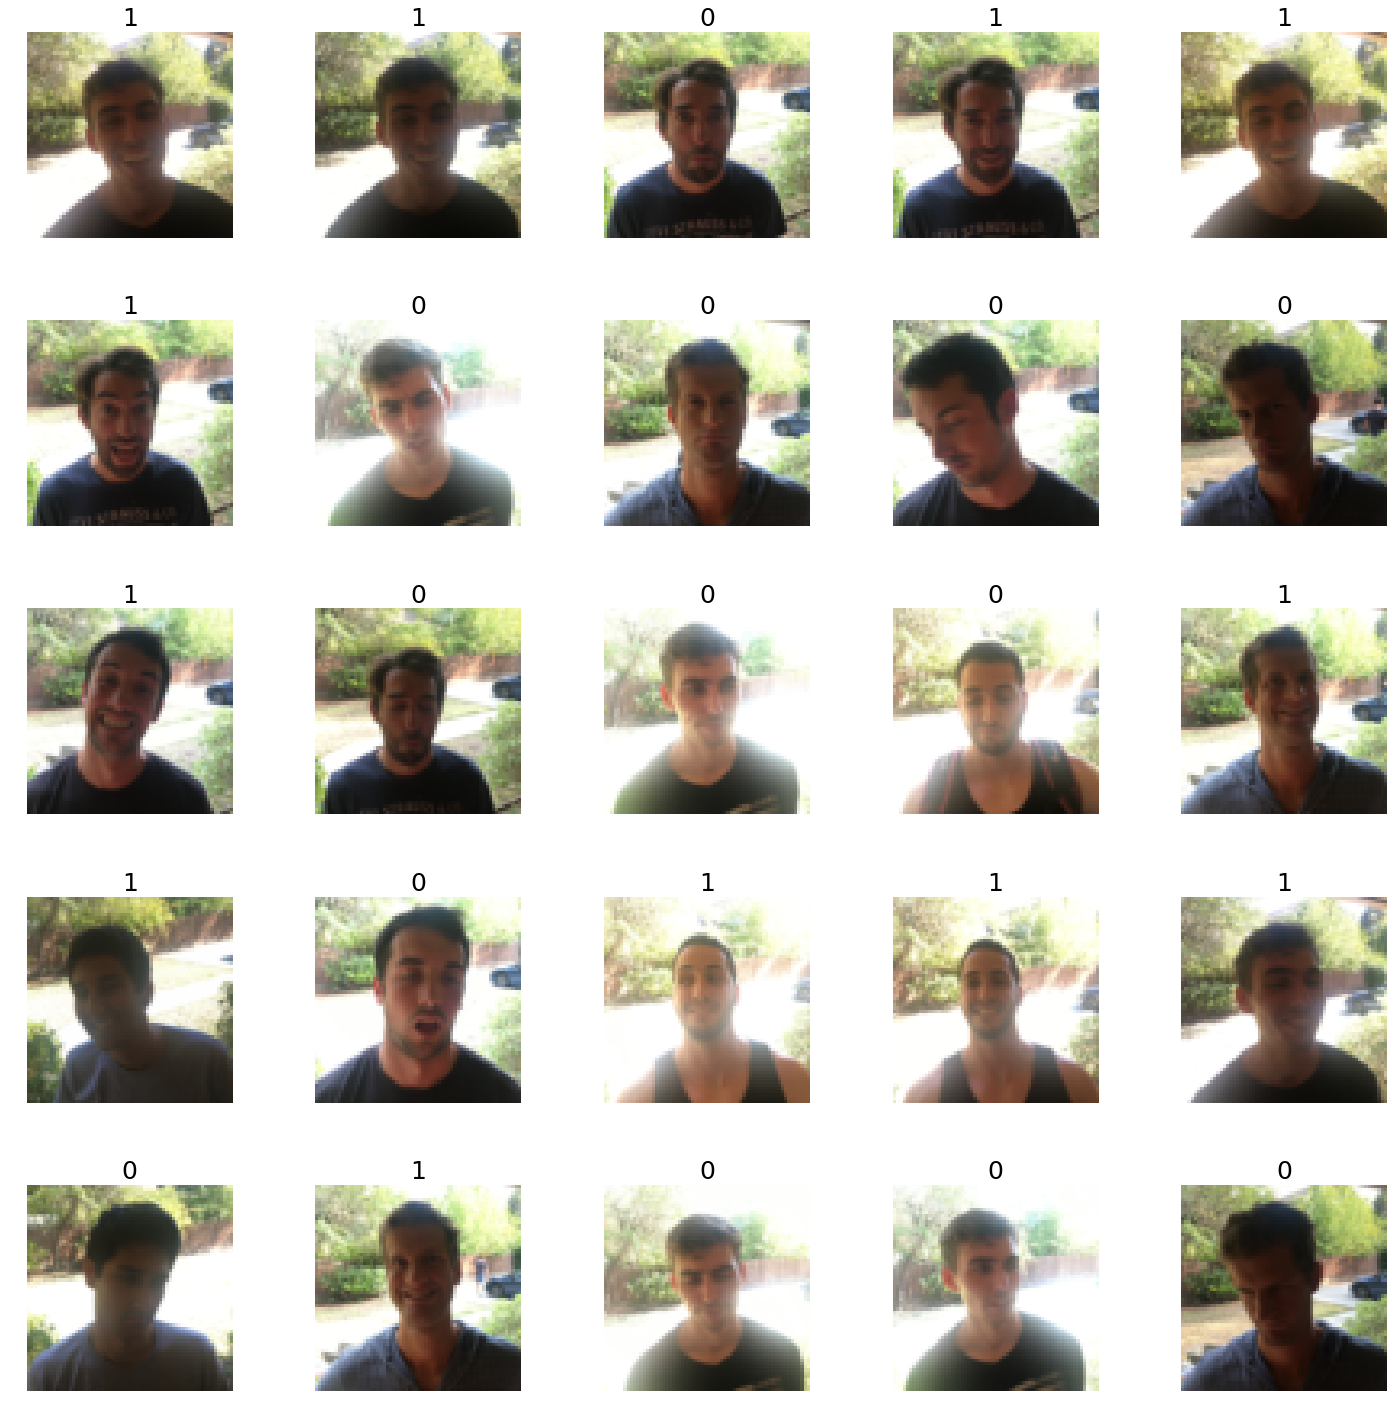

In [0]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# STEP #3: DATA PREPARATION

In [0]:
# Let's normalize dataset
X_train = X_train/255
X_test = X_test/255


In [0]:
X_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

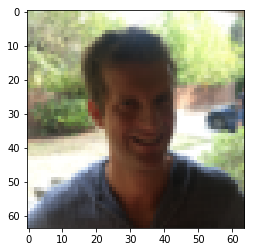

In [0]:
plt.imshow(X_train[9])

In [0]:
X_train.shape

(600, 64, 64, 3)

In [0]:
y_train.shape

(600,)

# STEP#4: MODEL TRAINING

In [0]:
import tensorflow as tf

cnn = tf.keras.Sequential()

cnn.add(tf.keras.layers.Conv2D(64, (6,6), activation = 'relu', input_shape = (64,64,3)))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

# cnn.add(tf.keras.layers.Dropout(0.2))


cnn.add(tf.keras.layers.Conv2D(64, (5,5), activation = 'relu'))
cnn.add(tf.keras.layers.MaxPooling2D(2,2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(128, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(64, activation = 'relu'))

cnn.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 59, 59, 64)        6976      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [0]:
cnn.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
history = cnn.fit(X_train,
                 y_train, 
                 batch_size = 30,
                 nb_epoch = 50,
                 verbose = 1)

W0902 01:18:34.152857 140499909740416 training.py:617] The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 600 samples
Epoch 1/50
600/600 [==============================] - 10s 16ms/sample - loss: 0.7023 - accuracy: 0.5333
Epoch 2/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.6513 - accuracy: 0.6183
Epoch 3/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.4763 - accuracy: 0.7517
Epoch 4/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.3532 - accuracy: 0.8400
Epoch 5/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.2863 - accuracy: 0.8883
Epoch 6/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.2387 - accuracy: 0.8867
Epoch 7/50
600/600 [==============================] - 10s 16ms/sample - loss: 0.2154 - accuracy: 0.9150
Epoch 8/50
600/600 [==============================] - 9s 16ms/sample - loss: 0.1733 - accuracy: 0.9333
Epoch 9/50
600/600 [==============================] - 10s 16ms/sample - loss: 0.1380 - accuracy: 0.9517
Epoch 10/50
600/600 [============================

# STEP#5: MODEL EVALUATION

In [0]:
evaluation = cnn.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

150/150 [==============================] - 1s 5ms/sample - loss: 0.3254 - accuracy: 0.9400
Test Accuracy : 0.940


In [0]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [0]:
accuracy = history.history['accuracy']
loss = history.history['loss']



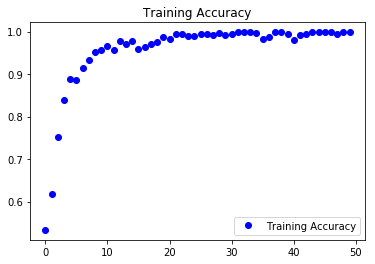

In [0]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.title('Training Accuracy')
plt.legend()

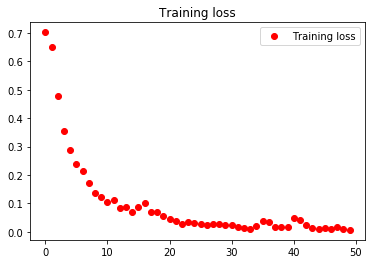

In [0]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.title('Training loss')
plt.legend()

In [0]:
predicted_classes = cnn.predict_classes(X_test)
y_true = y_test

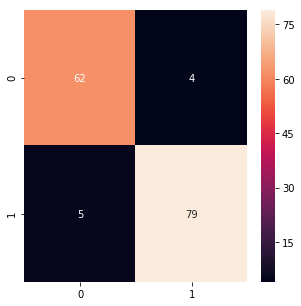

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True)

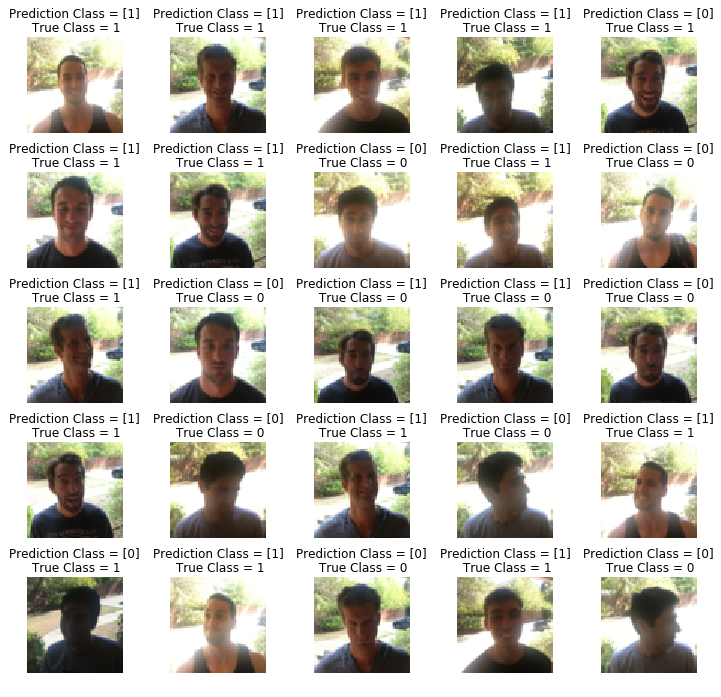

In [0]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))


In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        66
           1       0.95      0.94      0.95        84

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150



# GREAT JOB!